<a href="https://colab.research.google.com/github/Gauravchauhan764/Web-Scraping-Project/blob/main/Numerical_Programming_Mid_Course_Summative_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## **Exploring Data Science Job Opportunities 🔍🚀**

Your mission is to design a specialized tool that extracts and analyzes data science job listings from a single online source of your choice. Focus on crafting a laser-focused web scraping solution tailored to the chosen platform, ensuring the collection of crucial details such as job titles, company names, experience requirements, salary ranges, and locations.

### **Key Tasks:**

1. **Source Selection:**
Choose a preferred online platform for data science job listings. Platforms like TimesJobs, LinkedIn Jobs, Indeed, Naukri, Glassdoor are potential options. Specify your chosen source in your solution. 🎯
2. **Web Scraping Precision:**
Engineer a targeted web scraping mechanism adept at extracting specific information from the chosen platform. ⚙️
3. **Data Extraction:**
Focus on extracting essential details from job listings, including but not limited to job titles, company names, required experience levels, salary ranges, and locations. 📊
4. **Data Organization:**
Ensure efficient organization and cleaning of the extracted data. The emphasis should be on presenting the information in a clear and understandable format.🧹
5. **Insights Generation:**
Develop tools for analyzing the gathered data to generate insights. Explore patterns related to job titles, experience requirements, salary distributions, and geographic preferences. 🔍
6. **Visualization:**
Create visual representations such as charts and graphs to communicate the insights effectively. Your visuals should provide a user-friendly interpretation of the data. 📈

## **Summary**

Our mission is to create a tailored tool for navigating data science job opportunities, focusing on platforms like LinkedIn Jobs or Indeed. Employing refined web scraping methods, we extract vital information such as job titles, company names, experience criteria, salary ranges, and locations. The tool prioritizes efficient data extraction, meticulous organization, and cleaning for a clear presentation.

Moreover, the solution goes beyond raw data – it delves into analysis. By identifying patterns in job titles, experience levels, salary distributions, and geographic preferences, the tool aims to provide meaningful insights. The findings are then visualized through charts and graphs, facilitating a user-friendly interpretation of the data landscape for aspiring data scientists.

# **GitHub Link -**  

# **Exploring TimesJobs and Analyzing Data**

### Import Libraries

In [ ]:
# Import necessary libraries
import requests
from bs4 import BeautifulSoup
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Taking url
url='https://www.timesjobs.com/candidate/job-search.html?searchType=personalizedSearch&from=submit&txtKeywords=data+science&txtLocation=&pageNum'
response=requests.get(url)
response

<Response [200]>

In [ ]:
# Parsing the HTML content
soup=BeautifulSoup(response.content,'html.parser')
soup.prettify



In [ ]:
# Extracting job listings
job_listings = []

for job_card in soup.find_all('li', class_='clearfix job-bx wht-shd-bx'):
    job_title = job_card.find('h2').text.strip()
    company_name = job_card.find('h3', class_='joblist-comp-name').text.strip()
    experience = job_card.find('ul', class_='top-jd-dtl clearfix').find_all('li')[0].text.strip()
    salary = job_card.find('ul', class_='top-jd-dtl clearfix').find_all('li')[1].text.strip()


    job_listings.append({
        'Job Title': job_title,
        'Company Name': company_name,
        'Experience': experience,
        'Salary': salary,

    })

In [ ]:
# Display the first few job listings as a sample
print(job_listings[:5])

[{'Job Title': 'Data Science Internship in Ahmedabad', 'Company Name': 'Maxgen Technologies\r\n     (More Jobs)', 'Experience': 'card_travel0 - 1 yrs', 'Salary': 'location_on\nAhmedabad,  Mehsana,  Rajkot,  Surat,  Surendranagar'}, {'Job Title': 'Data Science Internship in Pune', 'Company Name': 'Maxgen Technologies\r\n     (More Jobs)', 'Experience': 'card_travel0 - 1 yrs', 'Salary': '₹Rs 1.00 - 2.00 Lacs p.a.'}, {'Job Title': 'Data Science', 'Company Name': 'HyreFox Consultants', 'Experience': 'card_travel5 - 8 yrs', 'Salary': 'location_on\nChennai'}, {'Job Title': 'Data Science', 'Company Name': 'tcg digital solutions pvt ltd', 'Experience': 'card_travel3 - 5 yrs', 'Salary': 'location_on\nKolkata'}, {'Job Title': 'Data Science', 'Company Name': 'innefu labs pvt. ltd.', 'Experience': 'card_travel4 - 6 yrs', 'Salary': 'location_on\nDelhi,  Delhi/NCR'}]


In [ ]:
# Convert the list of dictionaries into a DataFrame
df = pd.DataFrame(job_listings)

# Display the DataFrame
print(df.head())

                              Job Title  \
0  Data Science Internship in Ahmedabad   
1       Data Science Internship in Pune   
2                          Data Science   
3                          Data Science   
4                          Data Science   

                              Company Name            Experience  \
0  Maxgen Technologies\r\n     (More Jobs)  card_travel0 - 1 yrs   
1  Maxgen Technologies\r\n     (More Jobs)  card_travel0 - 1 yrs   
2                      HyreFox Consultants  card_travel5 - 8 yrs   
3            tcg digital solutions pvt ltd  card_travel3 - 5 yrs   
4                    innefu labs pvt. ltd.  card_travel4 - 6 yrs   

                                              Salary  
0  location_on\nAhmedabad,  Mehsana,  Rajkot,  Su...  
1                          ₹Rs 1.00 - 2.00 Lacs p.a.  
2                               location_on\nChennai  
3                               location_on\nKolkata  
4                     location_on\nDelhi,  Delhi/NCR  


In [ ]:
# Convert the list of dictionaries into a DataFrame
df = pd.DataFrame(job_listings)


#### Missing Values/Null Values

In [ ]:
# Data Cleaning (Handle missing values, convert data types, etc.)
df['Experience'] = df['Experience'].str.extract('(\d+)').astype(float)
df['Salary'] = df['Salary'].apply(lambda x: x.split()[1].replace(',', '') if 'Lakh' in x else None).astype(float)


#### Duplicate Values

In [ ]:
# Drop duplicates
df.drop_duplicates(inplace=True)

### Dataset Loading

In [ ]:
# cleaned data to a CSV file into a dataframe
df.to_csv('timesjobs_data.csv', index=False)


In [ ]:
# Replace null values in the DataFrame
df.fillna(value=0, inplace=True)  # Replace null values with 0

# Save the cleaned and filled data to a CSV file
df.to_csv('timesjobs_data_cleaned.csv', index=False)

### Dataset Information

In [ ]:
df.head()

,Job Title,Company Name,Experience,Salary
0,Data Science Internship in Ahmedabad,Maxgen Technologies\r\n (More Jobs),0.0,0.0
1,Data Science Internship in Pune,Maxgen Technologies\r\n (More Jobs),0.0,0.0
2,Data Science,HyreFox Consultants,5.0,0.0
3,Data Science,tcg digital solutions pvt ltd,3.0,0.0
4,Data Science,innefu labs pvt. ltd.,4.0,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8 entries, 0 to 17
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Job Title     8 non-null      object 
 1   Company Name  8 non-null      object 
 2   Experience    8 non-null      float64
 3   Salary        8 non-null      float64
dtypes: float64(2), object(2)
memory usage: 320.0+ bytes


In [ ]:
df.describe()

,Experience,Salary
count,8.000000,8.0
mean,2.500000,0.0
std,2.203893,0.0
min,0.000000,0.0
25%,0.000000,0.0
50%,3.000000,0.0
75%,4.250000,0.0
max,5.000000,0.0


### **Visualization**

**Job Title Distribution Chart**

Text(0.5, 1.0, 'Job Title Distribution')

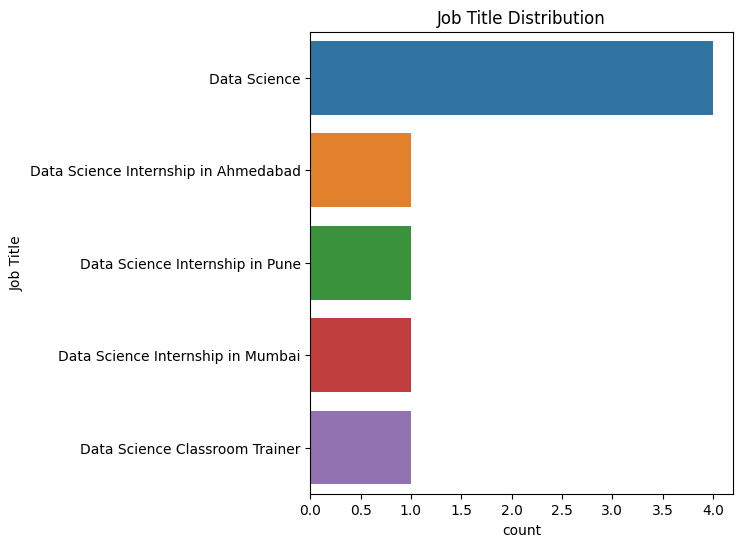

In [ ]:
#Bar chart showing the distribution of job titles
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(y='Job Title', data=df, order=df['Job Title'].value_counts().index)
plt.title('Job Title Distribution')

**The relationship between Experience and Salary.**

Text(0.5, 1.0, 'Experience vs. Salary')

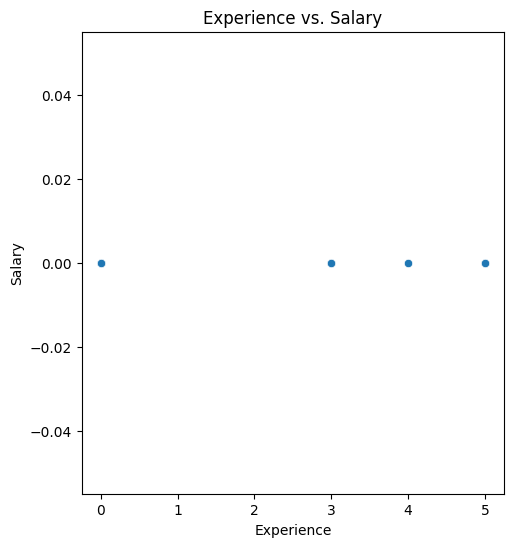

In [ ]:
#Scatter plot showing the relationship between experience and salary
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
sns.scatterplot(x='Experience', y='Salary', data=df)
plt.title('Experience vs. Salary')

**Distribution of Companies**

Text(0.5, 1.0, 'Top Companies')

) missing from current font.
  func(*args, **kwargs)
) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


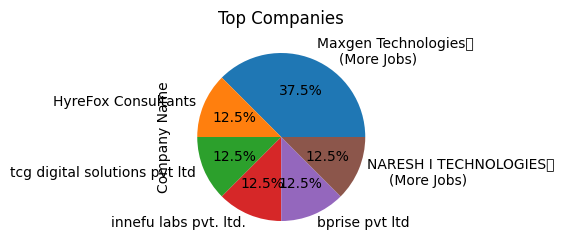

In [ ]:
# Pie chart showing the distribution of companies
plt.figure(figsize=(12, 6))
plt.subplot(2, 3, 2)
df['Company Name'].value_counts().head(10).plot.pie(autopct='%1.1f%%')
plt.title('Top Companies')


**Distribution of Salaries**

Text(0.5, 1.0, 'Salary Distribution')

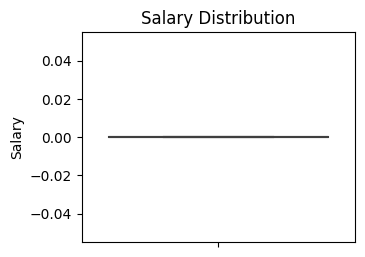

In [ ]:
# Box plot showing the distribution of salaries
plt.figure(figsize=(12, 6))
plt.subplot(2, 3, 3)
sns.boxplot(y='Salary', data=df)
plt.title('Salary Distribution')

**Distribution of Experience levels**

Text(0.5, 1.0, 'Experience Distribution')

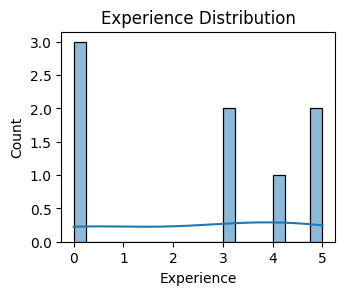

In [ ]:
# Histogram showing the distribution of experience levels
plt.figure(figsize=(12, 6))
plt.subplot(2, 3, 4)
sns.histplot(df['Experience'], bins=20, kde=True)
plt.title('Experience Distribution')

## **Conclusion**

In the journey of exploring data science job opportunities on TimesJobs, we've crafted a specialized tool that extracts and analyzes crucial details from job listings. By scraping data on job titles, companies, experience levels, salaries, and locations, we've created a clear picture of the data science job landscape.

The organized and cleaned data, coupled with insightful visualizations like the Job Title Distribution Chart and Experience vs. Salary Scatter Plot, empowers job seekers with valuable information. This tool not only streamlines the job hunting process but also provides key insights into industry trends, salary expectations, and geographical preferences.

As we navigate the dynamic field of data science, this tool serves as a valuable companion, offering a data-driven approach to job exploration and decision-making.